In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
from src import config

In [2]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "pairwise_sessions_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "pairwise_sessions_labels_df.pkl"))

In [3]:
# Remove all the features that are not contains 'Pre' in their name
features_df = features_df.loc[:, ~features_df.columns.str.contains('Post')]

# Remove all the features that are not contains 'DVA' in their name or config.MOVIE
# features_df = features_df.loc[:, features_df.columns.str.contains('DVA') | features_df.columns.str.contains(config.MOVIE)]

# Change the names of the features to be more readable-
# remove the suffix '_Pre'
features_df.columns = [col.replace('_Pre', '') for col in features_df.columns]
# Take all the features that start with 'DVA', and add the suffix '_Distance' to them
# features_df.columns = [col + '_Distance' if col.startswith('DVA') else col for col in features_df.columns]
# features_df.columns = [col.replace('DVA_', '') for col in features_df.columns]

features_df.head()

,Movie,Gaze_Counts_In_RoI,Gaze_Counts_Out_RoI,Gaze_In_out_RoI_Ratio,Gaze_Re_Entries_To_RoI_Count,Gaze_Re_Entries_To_RoI_Rate,Fixations_Counts_In_RoI,Fixations_Counts_Out_RoI,Fixations_In_out_RoI_Ratio,Fixations_Re_Entries_To_RoI_Count,...,SQRT_DVA_Max_Fixations,Distance_Min_Fixations,DVA_Min_Fixations,SQRT_DVA_Min_Fixations,Distance_Sem_Fixations,DVA_Sem_Fixations,SQRT_DVA_Sem_Fixations,Distance_AUC_Fixations,DVA_AUC_Fixations,SQRT_DVA_AUC_Fixations
0,17,-1.0,0.078068,-1.0,-1.0,-1.0,-1.0,0.421053,-1.0,-1.0,...,0.015794,-0.706892,-0.708244,-0.459856,-0.034055,-0.034264,-0.03223,0.481878,0.481708,0.424344
1,59,0.944444,-0.007256,0.944848,0.5,0.5,NaN,-0.052632,NaN,NaN,...,-0.008087,0.176254,0.182153,0.095651,-0.056264,-0.060156,-0.09353,0.002899,0.002563,-0.024273
2,6,-1.0,0.00679,-1.0,-1.0,-1.0,NaN,-0.142857,NaN,NaN,...,0.007391,0.482661,0.479341,0.278433,-0.317705,-0.317179,-0.360133,0.085307,0.082894,-0.01638
3,39,-0.538793,0.036614,-0.55568,0.0,0.0,-0.5,-0.130435,-0.425,0.0,...,-0.002056,-0.013556,0.009354,0.004688,-0.062362,-0.059379,-0.073431,-0.094482,-0.094433,-0.119179
4,50,-1.0,0.103968,-1.0,-1.0,-1.0,-1.0,0.259259,-1.0,-1.0,...,0.125335,0.964707,0.964855,0.812529,-0.168671,-0.176635,-0.38426,0.258452,0.260548,0.225302


In [4]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4352 entries, 0 to 4351
Columns: 103 entries, Movie to SQRT_DVA_AUC_Fixations
dtypes: int8(1), object(102)
memory usage: 3.4+ MB


In [5]:
labels_df.head()

,normalized_by_session_a
series_id,
0,1
1,1
2,1
3,1
4,0


In [6]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4352 entries, 0 to 4351
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   normalized_by_session_a  4352 non-null   int64
dtypes: int64(1)
memory usage: 68.0 KB


Data Cleaning

how many missing values / inf values are there in each column? show the top 10

In [7]:
print('Number of missing values in each column:', features_df.isin([np.nan, np.inf, -np.inf]).sum(axis=0).sort_values(ascending=False).head(10))

Number of missing values in each column: Pupil radius                                4352
onset_Sem_Saccades_Start_In_RoI             2858
onset_Std_Saccades_Start_In_RoI             2858
Pupil radius_Fixations_ReEntry_Mean_Diff    2846
Pupil radius_Fixations_First_Diff           2840
onset_Sem_Fixations_In_RoI                  2780
onset_Std_Fixations_In_RoI                  2780
last_onset_Sem_Saccades_End_In_RoI          2762
last_onset_Std_Saccades_End_In_RoI          2762
onset_Min_Saccades_Start_In_RoI             2288
dtype: int64


Remove columns with more than 30% missing values or inf values

In [8]:
features_df = features_df.loc[:, features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0) < 0.3]

In [9]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

Gaze_Counts_In_RoI              0.290441
Gaze_In_out_RoI_Ratio           0.290441
Gaze_Re_Entries_To_RoI_Count    0.290441
Gaze_Re_Entries_To_RoI_Rate     0.290441
Distance_Min_Gaze               0.249081
DVA_Min_Gaze                    0.249081
SQRT_DVA_Min_Gaze               0.249081
DVA_Sem_Fixations               0.005974
Distance_Std_Fixations          0.005974
Distance_Sem_Fixations          0.005974
dtype: float64

how many missing values / inf values are there in each row? show the top 10

In [10]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

2921    0.549020
2698    0.549020
2257    0.549020
3865    0.549020
1188    0.529412
1647    0.529412
3823    0.470588
440     0.470588
3009    0.470588
3419    0.470588
dtype: float64

Remove rows with more than 50% missing values

In [11]:
features_df = features_df.loc[features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1) < 0.5]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [12]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

440     0.470588
3823    0.470588
3009    0.470588
3419    0.470588
3748    0.411765
3740    0.411765
2785    0.411765
2774    0.411765
4107    0.196078
2268    0.196078
dtype: float64

Subject-wise or leave-one-subject-out (LOSO) cross-validation

Leave-One-Subject-Out Cross-Validation (LOSO CV):
- For each fold of the cross-validation, data from N-1 participants are used for training, and the data from the remaining participant is used for testing.
- This process is repeated N times (for each participant), ensuring that each participant's data is used as a test set exactly once.
- This method ensures that the model generalizes well across different participants.

In [13]:
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "pairwise_sessions_series_id_df.pkl"))

# remove the corresponding rows from y_train
series_id_df = series_id_df.loc[series_id_df.index.isin(features_df.index)]

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Order the list of subject IDs alphabetically
subject_ids = np.sort(subject_ids)

# Create groups of subject IDs
groups = series_id_df[config.SUBJECT].values

# Print the groups
print(groups)

['FY25' 'PS08' 'MA40' ... 'MA40' 'AI09' 'ZN05']


In [14]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
def logistic_regression_model_searcher():
    # Define the range of values for each hyperparameter
    C = np.linspace(0.01, 1, 15)
    PENALTY = ['l1', 'l2']
    SOLVER = ['liblinear', 'saga']
    
    LR_PARAM_GRID  = {
        'C': C,
        'penalty': PENALTY,
        'solver': SOLVER
    }
    
    return GridSearchCV(estimator=LogisticRegression(), param_grid=LR_PARAM_GRID, verbose=0)


In [16]:
# Gradient Boosting:

def gradient_boosting_model_searcher():
    # Define the range of values for each hyperparameter
    LEARNING_RATE = np.linspace(0.05, 0.5, 5)
    MAX_DEPTH = range(2, 4)
    N_ESTIMATORS = range(100, 150, 5)
    
    GB_PARAM_GRID  = {
        'learning_rate': LEARNING_RATE,
        'max_depth': MAX_DEPTH,
        'n_estimators': N_ESTIMATORS
    }
    
    return GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=GB_PARAM_GRID, verbose=0)

In [17]:
# SVM:

def svm_model_searcher():
    # Define the range of values for each hyperparameter
    C = np.linspace(0.01, 1, 10)
    KERNEL = ['linear', 'poly', 'rbf', 'sigmoid']
    GAMMA = ['scale', 'auto']
    
    SVM_PARAM_GRID  = {
        'C': C,
        'kernel': KERNEL,
        'gamma': GAMMA
    }
    
    return GridSearchCV(estimator=SVC(), param_grid=SVM_PARAM_GRID, verbose=0)

In [18]:
# Random Forest:

def random_forest_model_searcher():
    # Define the range of values for each hyperparameter
    N_ESTIMATORS = range(50, 140, 10)
    MAX_DEPTH = range(2, 5)
    MIN_SAMPLES_SPLIT = range(2, 4)
    MIN_SAMPLES_LEAF = range(1, 3)
    
    RF_PARAM_GRID  = {
        'n_estimators': N_ESTIMATORS,
        'max_depth': MAX_DEPTH,
        'min_samples_split': MIN_SAMPLES_SPLIT,
        'min_samples_leaf': MIN_SAMPLES_LEAF
    }
    
    return GridSearchCV(estimator=RandomForestClassifier(), param_grid=RF_PARAM_GRID, verbose=0)

In [19]:
# XGBoost model

def xgboost_model_searcher():
    # Define the range of values for each hyperparameter
    LEARNING_RATE = np.linspace(0.05, 0.5, 5)
    MAX_DEPTH = range(2, 5)
    N_ESTIMATORS = range(100, 150, 5)
    
    XGB_PARAM_GRID  = {
        'learning_rate': LEARNING_RATE,
        'max_depth': MAX_DEPTH,
        'n_estimators': N_ESTIMATORS
    }
    
    return GridSearchCV(estimator=XGBClassifier(), param_grid=XGB_PARAM_GRID, verbose=0)

In [20]:
classifiers = {
    # 'SVM': svm_model_searcher(),
    # 'Gradient Boosting': gradient_boosting_model_searcher(),
    # 'Random Forest': random_forest_model_searcher(),
    # 'Logistic Regression': logistic_regression_model_searcher(),
    'XGBoost': xgboost_model_searcher()
}

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()
    
    return confusion_mat

XGBoost on NN81
Accuracy: 0.72
Precision: 0.69
Recall: 0.73
F1-score: 0.71
ROC-AUC score: 0.72


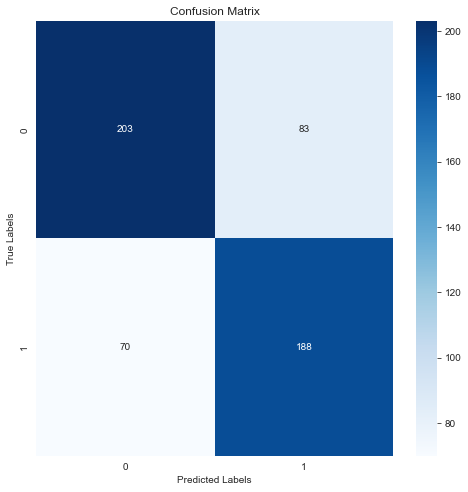

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize k-fold cross-validation
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

# Function to perform LOSO CV and return average accuracy
def evaluate_classifier(model_searcher, X, y, groups, name):
    accuracies = {}
    confusion_matricies = {}
    confidence_intervals = {}
    models = {}
    roc_auc_curves = {}

    for train_index, test_index in kfold.split(X, y, groups):
        # Extract indices for training and testing data for each participant
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # fill inf values with the mean of the column
        X_train = X_train.replace([np.inf, -np.inf], np.nan)
        X_test = X_test.replace([np.inf, -np.inf], np.nan)
        X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
        X_test = X_test.fillna(X_train.mean())

        # Scale the data
        # Create separate StandardScaler instances
        scaler_x = StandardScaler()
        # Fit on Training Data (!)
        scaler_x.fit(X_train.values)
        # Transform both training and testing data
        X_train_scaled = scaler_x.transform(X_train.values)
        X_test_scaled = scaler_x.transform(X_test.values)
        y_train = y_train.values.reshape(-1, 1).flatten()
        y_test = y_test.values.reshape(-1, 1).flatten()
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

        model_searcher.fit(X_train_scaled, y_train)
        clf = model_searcher.best_estimator_

        # Fit the classifier
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)

        acc = accuracy_score(y_test, y_pred)
        # Store the results for this fold using subject name as key
        subject_name = groups[test_index[0]]
        accuracies[subject_name] = acc
        conf_mat = evaluate_model(f"{name} on {subject_name}", y_test, y_pred)
        confusion_matricies[subject_name] = conf_mat
        models[subject_name] = clf
        confidence_intervals[subject_name] = (acc - 1.96 * np.sqrt(acc * (1 - acc) / len(y_test)), acc + 1.96 * np.sqrt(acc * (1 - acc) / len(y_test)))
        roc_auc_curves[subject_name] = y_test, clf.predict_proba(X_test_scaled)[:, 1]

    # return all the computed dictionaries
    return accuracies, confusion_matricies, confidence_intervals, models, roc_auc_curves

# Evaluate each classifier
results = {}
for name, clf in classifiers.items():
    acc, confusion_matricies, confidence_intervals, models, roc_auc_curves = evaluate_classifier(clf, features_df, labels_df, groups, name)
    avg_confusion_matrix = np.mean(list(confusion_matricies.values()), axis=0)
    avg_acc = np.mean(list(acc.values())) 

    results[name] = avg_acc, avg_confusion_matrix, acc, confusion_matricies, confidence_intervals, models, roc_auc_curves
    print(f"Average accuracy of {name}: {avg_acc:.4f}")
    print(f"Average confusion matrix of {name}: {avg_confusion_matrix}")

# Decision-making (choose the classifier with the highest average accuracy)
best_classifier_name = max(results, key=lambda k: results[k][0])
print(f"\nThe best classifier is: {best_classifier_name} with accuracy: {results[best_classifier_name][0]:.4f}")

In [ ]:
# Plot the average confusion matrix without colors
# round the values in the confusion matrix
avg_confusion_matrix_round = np.round(results[best_classifier_name][1]).astype(int)

# Create a heatmap visualization of the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
# average confusion matrix with No colors
sns.heatmap(avg_confusion_matrix_round, annot=True, cmap="gray", fmt="d", ax=ax, vmin=0, vmax=np.max(avg_confusion_matrix_round))

# Set the axis values- replace 0 with 1st viewing and 1 with 2nd viewing
ax.set_xticklabels(['1st viewing', '2nd viewing'])
ax.set_yticklabels(['1st viewing', '2nd viewing'])

# Set the axis labels and title
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Average Confusion Matrix")

# Style
# Make the fonts visible in the plot
plt.rcParams.update({'font.size': 20})
# Make the tick labels of the heatmap visible
for tick in ax.get_xticklabels():
    tick.set_visible(True)
for tick in ax.get_yticklabels():
    tick.set_visible(True)
    
# Save the plot
plt.savefig(os.path.join(config.classification_resource_dir, "confusion_matrix.svg"), bbox_inches='tight')

# Show the plot
plt.show()

Calculating ROC AUC for each participant (fold)

In [ ]:
from sklearn.metrics import roc_curve, auc

roc_auc_curves = results[best_classifier_name][6]

# Plot ROC curve for each participant
fig, ax = plt.subplots(figsize=(16, 16))

# For each fold calculate ROC curve and ROC area
for subject_name, (y_test, y_pred) in roc_auc_curves.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve with transparency
    ax.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC curve of {subject_name} (area = {roc_auc:.2f})')
    
# Plot ROC curve for average classifier with error bars representing 95% confidence intervals
y_test, y_pred = np.concatenate([y_test for y_test, y_pred in roc_auc_curves.values()]), np.concatenate([y_pred for y_test, y_pred in roc_auc_curves.values()])
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve of average classifier (area = {roc_auc:.2f})')

# Plot ROC curve for random classifier
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Set the limits of the plot to include both curves
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Set the axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
# Without legends
# ax.legend(loc="lower right")

# Transparent background
ax.patch.set_alpha(0.0)

# Save the plot
plt.savefig(os.path.join(config.classification_resource_dir, "roc_auc.svg"), bbox_inches='tight')

# Show the plot
plt.show()

Calculating Performance Across Participants (Subject-wise)

The Y-axis can represent the accuracy for each participant, i.e., the percentage of correct classifications. This is the most direct measure of classifier performance and would be readily interpretable by most readers. We can use error bars to represent confidence intervals for each participant's accuracy.

In [ ]:
acc = results[best_classifier_name][2]
confidence_intervals = results[best_classifier_name][4]
avg_acc = results[best_classifier_name][0]

# Plot the accuracy for each participant with wide error bars representing 95% confidence intervals for each participant
fig, ax = plt.subplots(figsize=(16, 8))
# Sort the accuracies dictionary by value (accuracy) and plot the values
ax.bar(*zip(*sorted(acc.items(), key=lambda x: x[1])), yerr=[(upper - lower) / 2 for lower, upper in confidence_intervals.values()], capsize=10)

ax.set_xlabel("Subject")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy for each subject (model)")
# remove the ticks from the x-axis
ax.set_xticks([])

# Add a horizontal dashed line representing the average accuracy across participants
ax.axhline(y=avg_acc, color='g', linestyle='--')
# Add horizontal lines representing the chance level accuracy (50%) and the perfect accuracy (100%)
ax.axhline(y=0.5, color='r', linestyle='-')

# Increase font size
plt.rcParams.update({'font.size': 25})
# Save the plot
plt.savefig(os.path.join(config.classification_resource_dir, "accuracy_distribution.svg"), bbox_inches='tight')
# Show the plot
plt.show()

Take the best model and train it on the whole dataset

The best model is SVM, so we will train it on the whole dataset, using the average hyperparameters from the LOSO CV

In [ ]:
# Get the best model
best_model = results[best_classifier_name][5]

# Go over all the models and average the hyperparameters
best_model_params = {}
for model in best_model.values():
    for param, value in model.get_params().items():
        # If parameter is numeric, add it to the dictionary
        if isinstance(value, (int, float)):
            # if the parameter is already in the dictionary, append the value to the list
            if param in best_model_params:
                best_model_params[param].append(value)
            else:
                best_model_params[param] = [value]
for param, value in best_model_params.items():
    best_model_params[param] = np.mean(value)

best_model_params

In [ ]:
# Train the best model on the whole dataset using the average hyperparameters
X_train = features_df
y_train = labels_df

# fill inf values with the mean of the column
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()

# Scale the data
# Create separate StandardScaler instances
scaler_x = StandardScaler()
# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
y_train = y_train.values.reshape(-1, 1).flatten()
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# SVM
# Train final model with best hyperparameters
svm = SVC(C=0.446, gamma='scale', kernel='rbf')
svm.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = svm.predict(X_train_scaled)
acc = accuracy_score(y_train, y_pred)  
conf_mat = evaluate_model(f"svm on whole dataset", y_train, y_pred)


In [ ]:
# Train the best model on the whole dataset using the average hyperparameters
X_train = features_df
y_train = labels_df

# fill inf values with the mean of the column
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()

# Scale the data
# Create separate StandardScaler instances
scaler_x = StandardScaler()
# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
y_train = y_train.values.reshape(-1, 1).flatten()
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# SVM
# Train final model with best hyperparameters
xgb = XGBClassifier(learning_rate=0.1426, max_depth=2, n_estimators=124)
xgb.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = xgb.predict_proba(X_train_scaled)[:, 1]
# acc = accuracy_score(y_train, y_pred)  
# conf_mat = evaluate_model(f"xgb on whole dataset", y_train, y_pred)


Plot ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

# Plot ROC curve for random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Set the limits of the plot to include both curves
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

Feature importance and SHAP values for the best model

In [ ]:
import shap
import matplotlib.pyplot as plt

%matplotlib inline

# Create object that can calculate shap values
explainer = shap.TreeExplainer(xgb)

# Calculate Shap values
shap_values = explainer.shap_values(X_train_scaled)

# Increase font size
plt.rcParams.update({'font.size': 30})

# Plot summary plot (feature importance) with the top 5 features
shap.summary_plot(shap_values, X_train_scaled, plot_type="bar", max_display=5)

# mark the features that has the suffix '_Distance' in their name with astrisk
# X_train_scaled.columns = ['* ' + col if col.endswith('Distance') else col for col in X_train_scaled.columns]

# Plot summary plot with the top 17 features
plt.figure(figsize=(16, 8))
shap.summary_plot(shap_values, X_train_scaled, max_display=17)

# Save the plot
plt.savefig(os.path.join(config.classification_resource_dir, "shap_values.png"))

# Plot dependence plot
shap.dependence_plot('SQRT_DVA_Mean_Gaze', shap_values, X_train_scaled, interaction_index="SQRT_DVA_Mean_Gaze")

# The contribution of the feature interaction to the model output
shap_interaction_values = explainer.shap_interaction_values(X_train_scaled)

# Plot interaction summary plot
shap.summary_plot(shap_interaction_values, X_train_scaled, max_display=5)

# Save the plot
plt.savefig(os.path.join(config.classification_resource_dir, "shap_interaction_values.png"))

# Plot interaction dependence plot
shap.dependence_plot(('SQRT_DVA_Mean_Gaze', 'SQRT_DVA_Mean_Gaze'), shap_interaction_values, X_train_scaled)

# Save the plot
plt.savefig(os.path.join(config.classification_resource_dir, "shap_interaction_values_dependence_plot.png"))

# the contribution of the interaction between the two features to the model output
shap.dependence_plot(('SQRT_DVA_Mean_Gaze', 'SQRT_DVA_Mean_Gaze'), shap_interaction_values, X_train_scaled, display_features=X_train_scaled)

# Save the plot
plt.savefig(os.path.join(config.classification_resource_dir, "shap_interaction_values_dependence_plot_with_features.png"))